# 202001549 장희권

In [35]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from tqdm.notebook import tqdm
import time
from konlpy.tag import Okt
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

In [36]:
driver = webdriver.Chrome(r"../chromedriver.exe")
main_url = "https://movie.daum.net/main"
driver.get(main_url)

C:\Users\user\AppData\Local\Temp\ipykernel_12848\1296405975.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"../chromedriver.exe")


In [37]:
movie_name = '완벽한 타인'

time.sleep(1)

search_path = '//*[@id="mainContent"]/div/div[1]/form/fieldset/div/input'
driver.find_element("xpath", search_path).send_keys(movie_name)

time.sleep(1)

click_path = '//*[@id="mainContent"]/div/div[1]/div/div/div/ul/li[1]/a'
driver.find_element("xpath", click_path).click()

time.sleep(1)

gradeButton_path = '//*[@id="mainContent"]/div/div[2]/div[1]/ul/li[4]/a'
driver.find_element("xpath", gradeButton_path).click()

In [38]:
viewMore_path = '//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'

while True:
    time.sleep(0.5)
    try:
        driver.find_element("xpath", viewMore_path).click()
    except:
        break

In [5]:
page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')

grade_list = []

cmt_lst = soup.find('ul', {"class":"list_comment"}).find_all('li')

sentence_class_name = "desc_txt"
ratings_class_name = "ratings"

avg_grade = float(soup.find('em', {'class':'num_rating'}).text[:-1])

for cmt in cmt_lst:
    try:
        rating = cmt.find('div', {'class':ratings_class_name}).text
        sentence = cmt.find('p', {'class':sentence_class_name}).text
        grade_list.append((int(rating), sentence))
    except:
        pass

In [6]:
bad_grade_list = [(rating, sentence) for rating, sentence in grade_list if rating < avg_grade]
good_grade_list = [(rating, sentence) for rating, sentence in grade_list if rating >= avg_grade]

In [7]:
okt = Okt()

In [8]:
grade_doc = '\n'.join(list(zip(*grade_list))[1])
grade_doc_noun = okt.nouns(grade_doc)

grade_count_noun = Counter(grade_doc_noun)
grade_count_noun.most_common(20)

[('영화', 823),
 ('생각', 235),
 ('연기', 216),
 ('배우', 164),
 ('사람', 135),
 ('것', 114),
 ('이서진', 112),
 ('비밀', 111),
 ('유해진', 109),
 ('이', 78),
 ('공감', 77),
 ('보고', 77),
 ('나', 75),
 ('재미', 75),
 ('더', 75),
 ('점', 73),
 ('수', 69),
 ('정말', 67),
 ('시간', 67),
 ('그냥', 65)]

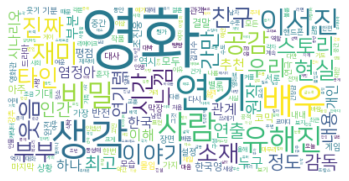

In [9]:
stopword_list = {'보고', '정말', '그냥'}

for text in grade_count_noun.copy():
    if len(text) == 1:
        stopword_list.add(text)

for stopword in stopword_list:
    grade_count_noun.pop(stopword)
    
wc_img = WordCloud(background_color="white", max_words=2000, font_path=r'C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumSquareR.ttf')
wc_img = wc_img.generate_from_frequencies(grade_count_noun)

plt.imshow(wc_img, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
bad_grade_doc = '\n'.join(list(zip(*bad_grade_list))[1])
bad_grade_doc_noun = okt.nouns(bad_grade_doc)

bad_grade_count_noun = Counter(bad_grade_doc_noun)
bad_grade_count_noun.most_common(20)

[('영화', 274),
 ('연기', 63),
 ('이서진', 59),
 ('배우', 58),
 ('생각', 53),
 ('것', 51),
 ('그냥', 42),
 ('돈', 42),
 ('사람', 38),
 ('유해진', 36),
 ('더', 32),
 ('비밀', 31),
 ('그', 31),
 ('좀', 29),
 ('이', 29),
 ('나', 28),
 ('보고', 27),
 ('왜', 27),
 ('원작', 26),
 ('볼', 26)]

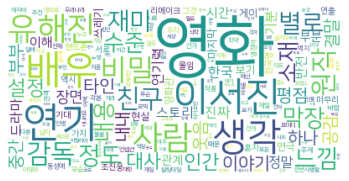

In [11]:
stopword_list = {'보고', '그냥'}

for text in bad_grade_count_noun.copy():
    if len(text) == 1:
        stopword_list.add(text)

for stopword in stopword_list:
    bad_grade_count_noun.pop(stopword)
    
wc_img = WordCloud(background_color="white", max_words=2000, font_path=r'C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumSquareR.ttf')
wc_img = wc_img.generate_from_frequencies(bad_grade_count_noun)

plt.imshow(wc_img, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
good_grade_doc = '\n'.join(list(zip(*good_grade_list))[1])
good_grade_doc_noun = okt.nouns(good_grade_doc)

good_grade_count_noun = Counter(good_grade_doc_noun)
good_grade_count_noun.most_common(20)

[('영화', 549),
 ('생각', 182),
 ('연기', 153),
 ('배우', 106),
 ('사람', 97),
 ('비밀', 80),
 ('유해진', 73),
 ('것', 63),
 ('공감', 59),
 ('이서진', 53),
 ('재미', 52),
 ('현실', 52),
 ('시간', 52),
 ('삶', 51),
 ('정말', 50),
 ('보고', 50),
 ('간만', 50),
 ('이', 49),
 ('점', 48),
 ('나', 47)]

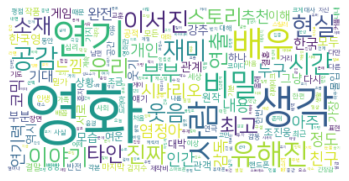

In [13]:
stopword_list = {'보고', '정말', '간만'}

for text in good_grade_count_noun.copy():
    if len(text) == 1:
        stopword_list.add(text)

for stopword in stopword_list:
    good_grade_count_noun.pop(stopword)
    
wc_img = WordCloud(background_color="white", max_words=2000, font_path=r'C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumSquareR.ttf')
wc_img = wc_img.generate_from_frequencies(good_grade_count_noun)

plt.imshow(wc_img, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
def pos_tokenize(raw_sent):
    pos_sent = []

    # raw_sent = '사과가 좋아'
    sent = okt.pos(raw_sent, norm=True, stem=True)
    # sent = [('사과', 'Noun'), ('가', 'Josa'), ('좋다', 'Adjective')]

    for tup in sent:
        word, tag = tup[0], tup[1]
        word_tag = word + '/' + tag
        pos_sent.append(word_tag)

    return ' '.join(pos_sent)

In [16]:
train = [(text, 'pos') if grade >= avg_grade else (text, 'neg') for grade, text in grade_list]

In [17]:
all_words = set()

for sent, label in train:
    sent = pos_tokenize(sent)
    words = word_tokenize(sent)

    for word in words:
        all_words.add(word)

In [18]:
# 각 문장에 단어 집합 안의 단어의 존재 여부 표현
train_features = []

for sent, label in train:
    sent = pos_tokenize(sent)
    words = word_tokenize(sent)

    tmp = {set_word: (set_word in words) for set_word in all_words}

    sent_tup = (tmp, label)
    train_features.append(sent_tup)

In [29]:
classifier = nltk.NaiveBayesClassifier.train(train_features)
classifier.show_most_informative_features(30) 

Most Informative Features
                 수준/Noun = True              neg : pos    =     28.1 : 1.0
               떨어지다/Verb = True              neg : pos    =     14.4 : 1.0
          짜증나다/Adjective = True              neg : pos    =     14.4 : 1.0
                  용/Noun = True              neg : pos    =     13.0 : 1.0
                TV/Alpha = True              neg : pos    =     10.3 : 1.0
         억지스럽다/Adjective = True              neg : pos    =     10.3 : 1.0
                 전체/Noun = True              neg : pos    =     10.3 : 1.0
                걍/Adverb = True              neg : pos    =      8.9 : 1.0
                맞추다/Verb = True              neg : pos    =      8.9 : 1.0
                 먹다/Verb = True              neg : pos    =      8.9 : 1.0
                 한테/Josa = True              neg : pos    =      8.9 : 1.0
                 치다/Verb = True              neg : pos    =      8.6 : 1.0
           아깝다/Adjective = True              neg : pos    =      8.4 : 1.0

In [34]:
test_sent = "영화 수준 떨어진다"

test_sent = pos_tokenize(test_sent)
words = word_tokenize(test_sent)
test_feature = {set_word: (set_word in words) for set_word in all_words}
classifier.classify(test_feature)

'neg'